In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/EECS545/Balanced_Dataset.zip' '/content'
!unzip 'Balanced_Dataset.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Balanced_Dataset/COVID/COVID-3264.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-3264.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-1473.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-1473.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-2393.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-2393.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-1842.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-1842.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-719.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-719.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-1856.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-1856.png  
  inflating: /content/Balanced_Dataset/COVID/COVID-3099.png  
  inflating: /content/__MACOSX/Balanced_Dataset/COVID/._COVID-3099.png  
  infl

In [87]:
import os
#os.mkdir('/content/HE_output')
output_directory_path='/content/HE_output/COVID'
os.mkdir(output_directory_path)

In [62]:
import os

import numpy as np
import pandas as pd


import PIL
import cv2
import matplotlib.pyplot as plt
def img_to_array(img):
    return np.array(img.getdata()).reshape(img.width, img.width, 3) / 255


def trim(im):
    
    bg = PIL.Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = PIL.ImageChops.difference(im, bg)
    diff = PIL.ImageChops.add(diff, diff, 2.0, -20)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)


def calc_thumbnail_size(img):
    """calculate thumbnail size with constant aspect ratio"""
    width, length = img.size
    ratio = width / length

    # for some reason, if it's exactly 224, then thumnailed image is 223
    dim = 224 + 1          # output dim
    if ratio > 1:
        size = (dim * ratio, dim)
    else:
        size = (dim, dim / ratio)
    return size


def calc_crop_coords(img):
    """crop to square of desired dimension size"""
    dim = 224
    width, length = img.size
    left = 0
    right = width
    bottom = length
    top = 0
    if width > dim:
        delta = (width - dim) / 2
        left = delta
        right = width - delta
    if length > dim:
        delta = (length - dim) / 2
        top = delta
        bottom = length - delta
    return (left, top, right, bottom)

def preprocess(img):
    img = trim(img)
    tsize = calc_thumbnail_size(img)
    img.thumbnail(tsize)
    crop_coords = calc_crop_coords(img)
    img = img.crop(crop_coords)
    return img

In [63]:
def clahe_rgb(img_path, cliplimit=None, tilesize=8):
    
    """ 
    For RGB images, the image is first converted to the LAB format, 
    and then CLAHE is applied to the isolated L channel.
    Input:
      img_path: path to the image file
      cliplimit: the high contrast limit applied to CLAHE processing; this value is often 2, 3 or 4.
      tilesize: defines the local neighborhood for histogram equalization
    Returns:
      bgr: image after CLAHE processing
    """
 
    bgr = cv2.imread(img_path)
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=cliplimit,tileGridSize=(tilesize, tilesize))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr

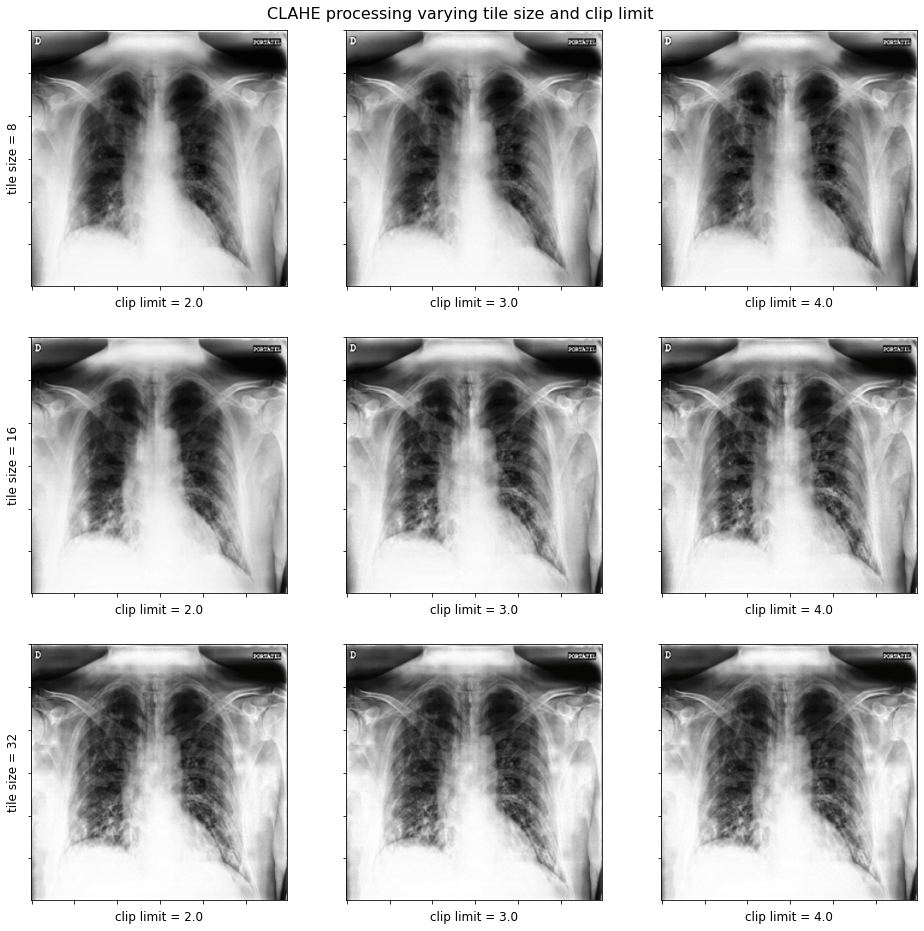

In [71]:
tilesize = [8,16,32]
cliplimit = [2.0, 3.0, 4.0]
img_path='/content/Balanced_Dataset/COVID/COVID-2096.png'
input_img = cv2.imread(img_path)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = axes.ravel()
fig.suptitle("CLAHE processing varying tile size and clip limit", y=0.9, fontsize=16)

k = 0
for ts in tilesize:
    for j in cliplimit:
        bgr  = clahe_rgb(img_path, cliplimit=j, tilesize=ts)
        ax = axes[k]
        ax.imshow(bgr)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
   
        if k % 3 == 0:
            ax.set_ylabel('tile size = {0}'.format(ts), fontsize=12)
        ax.set_xlabel('clip limit = {0}' .format(j), fontsize=12)
        
        k +=1

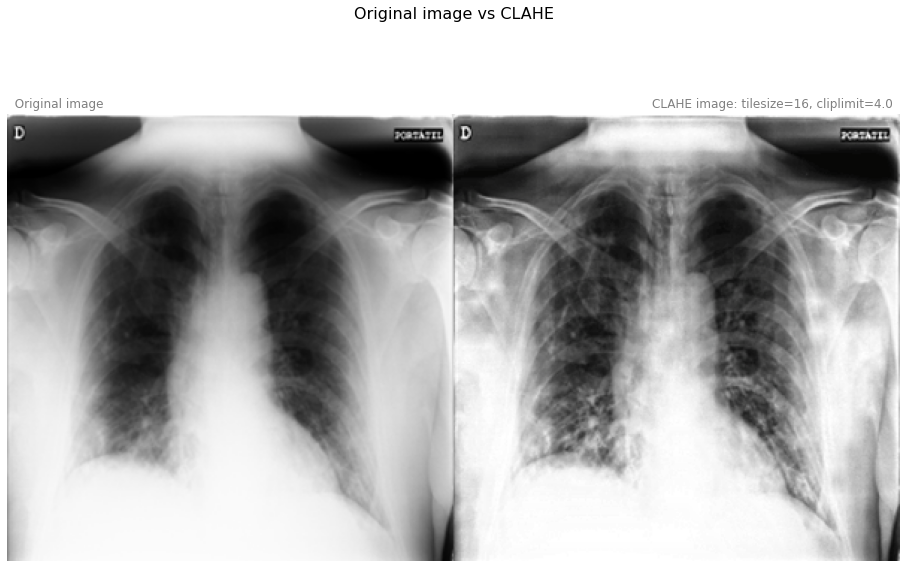

In [76]:
bgr  = clahe_rgb(img_path, cliplimit=4.0, tilesize=32)  
v = np.hstack((input_img, bgr))
plt.figure(figsize=(16,16))              
plt.imshow(v)
plt.axis('off')
plt.title('Original image vs CLAHE', y=1.2, fontsize=16)
plt.title('CLAHE image: tilesize=16, cliplimit=4.0  ', color='gray', loc='right')
plt.title('  Original image', color='gray', loc='left');

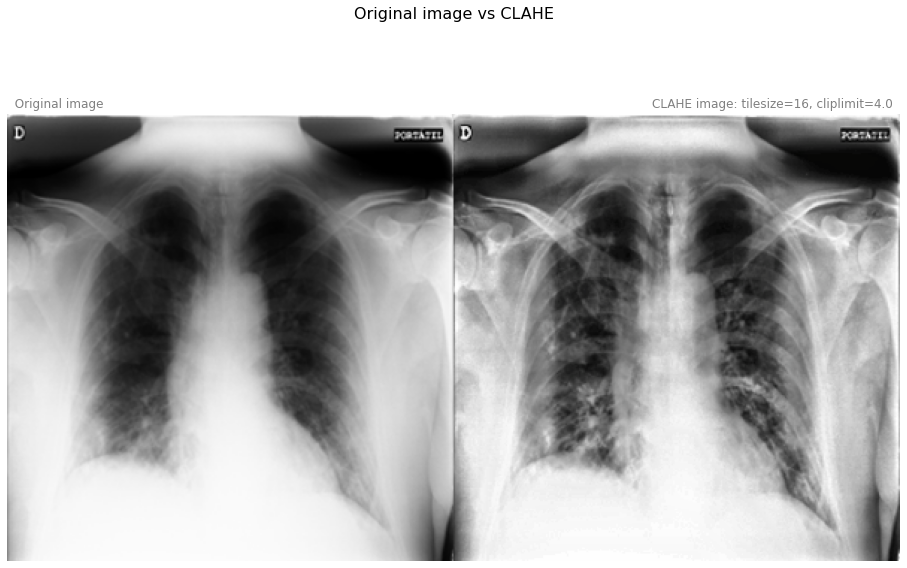

In [75]:
bgr  = clahe_rgb(img_path, cliplimit=4.0, tilesize=16)  
v = np.hstack((input_img, bgr))
plt.figure(figsize=(16,16))              
plt.imshow(v)
plt.axis('off')
plt.title('Original image vs CLAHE', y=1.2, fontsize=16)
plt.title('CLAHE image: tilesize=16, cliplimit=4.0  ', color='gray', loc='right')
plt.title('  Original image', color='gray', loc='left');

In [81]:
import cv2
import os
import numpy as np
from tqdm import tqdm

In [88]:
input_directory_path='/content/Balanced_Dataset/COVID'
img_list = os.listdir(input_directory_path+"/")
  #parse over path
for i in tqdm(range(len(img_list))): 
    img_name = img_list[i] 
    img_path = input_directory_path+'/'+ img_list[i] 
      #read image from image path
    bgr  = clahe_rgb(img_path, cliplimit=4.0, tilesize=32)  
    cv2.imwrite(output_directory_path +"/"+"COVID" +str(i)+'.png',bgr)
    

100%|██████████| 3616/3616 [00:42<00:00, 84.13it/s]


In [89]:
!zip -r /content/HE_output.zip /content/HE_output

Streaming output truncated to the last 5000 lines.
  adding: content/HE_output/Normal/Normal2456.png (deflated 12%)
  adding: content/HE_output/Normal/Normal2239.png (deflated 14%)
  adding: content/HE_output/Normal/Normal609.png (deflated 14%)
  adding: content/HE_output/Normal/Normal1358.png (deflated 14%)
  adding: content/HE_output/Normal/Normal907.png (deflated 13%)
  adding: content/HE_output/Normal/Normal3202.png (deflated 15%)
  adding: content/HE_output/Normal/Normal1326.png (deflated 15%)
  adding: content/HE_output/Normal/Normal1378.png (deflated 14%)
  adding: content/HE_output/Normal/Normal258.png (deflated 15%)
  adding: content/HE_output/Normal/Normal288.png (deflated 13%)
  adding: content/HE_output/Normal/Normal2655.png (deflated 14%)
  adding: content/HE_output/Normal/Normal2070.png (deflated 14%)
  adding: content/HE_output/Normal/Normal2715.png (deflated 14%)
  adding: content/HE_output/Normal/Normal2533.png (deflated 15%)
  adding: content/HE_output/Normal/Normal32